## Assignment 2 : pandas + Regular Expressions
#### Name : Amit Gido
#### ID : 315754606

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
PATH = "C:\\Users\\dell\\Desktop\\לימודים\\שנה ג\\סמסטר ב\\כרייה וניתוח נתונים מתקדם\\Datasets and Resources\\"


In [3]:
data = open(PATH + 'matala2_cosmetics_2019-Nov.csv')
df = pd.read_csv(data)


<ipython-input-3-98d79edf13d9>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


In [4]:
df.drop(columns=['brand','category_code','category_id'], inplace=True)


In [5]:
df


,event_time,event_type,product_id,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


##### Convert column event_time to Datetime :

In [6]:
df['datetime'] = pd.to_datetime(df['event_time'])


##### Convert the user_session column to a numeric category with one column :

In [7]:
df['user_session'] = df['user_session'].fillna(df['user_id'])


In [8]:
df['user_session_numeric'] = df['user_session'].astype('category').cat.codes


In [9]:
df


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric
0,2019-11-01 00:00:02 UTC,view,5802432,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2019-11-01 00:00:02+00:00,37006
1,2019-11-01 00:00:09 UTC,cart,5844397,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:09+00:00,120057
2,2019-11-01 00:00:10 UTC,view,5837166,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,2019-11-01 00:00:10+00:00,324128
3,2019-11-01 00:00:11 UTC,cart,5876812,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,2019-11-01 00:00:11+00:00,90500
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:24+00:00,120057
...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,2019-11-30 23:59:46+00:00,876914
4635833,2019-11-30 23:59:47 UTC,view,5733064,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,2019-11-30 23:59:47+00:00,630555
4635834,2019-11-30 23:59:47 UTC,view,5867785,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,2019-11-30 23:59:47+00:00,780606
4635835,2019-11-30 23:59:57 UTC,view,5779406,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,2019-11-30 23:59:57+00:00,782673


##### Sort the dataframe by user ID and then by dates for each user ID :

In [10]:
df_sorted = df.sort_values(['user_session_numeric', 'datetime'], ascending=[True, True])


In [11]:
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric
732441,2019-11-06 15:12:02 UTC,remove_from_cart,5660213,4.76,230956608,230956608,2019-11-06 15:12:02+00:00,0
732445,2019-11-06 15:12:04 UTC,remove_from_cart,5773401,1.27,230956608,230956608,2019-11-06 15:12:04+00:00,0
2150628,2019-11-16 20:53:37 UTC,cart,5875317,1.59,234195672,234195672,2019-11-16 20:53:37+00:00,1
2150636,2019-11-16 20:53:40 UTC,remove_from_cart,5863841,9.52,234195672,234195672,2019-11-16 20:53:40+00:00,1
3346744,2019-11-23 17:06:08 UTC,cart,5830276,3.57,238583000,238583000,2019-11-23 17:06:08+00:00,2
...,...,...,...,...,...,...,...,...
3936488,2019-11-27 09:26:21 UTC,view,5588154,77.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328
3936633,2019-11-27 09:27:35 UTC,view,5676246,137.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:27:35+00:00,942328
1225082,2019-11-09 17:02:14 UTC,view,5847328,8.25,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329
159765,2019-11-02 11:47:34 UTC,view,5528034,9.52,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330


### Question 1 :

##### Group the dataframe by user_id, and calculate the time difference between consecutive events for each group :

In [12]:
df_sorted['duration_to_next_event'] = df_sorted.groupby('user_session_numeric')['datetime'].apply(lambda x: x.diff().dt.total_seconds())


<ipython-input-12-9611d774725b>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_sorted['duration_to_next_event'] = df_sorted.groupby('user_session_numeric')['datetime'].apply(lambda x: x.diff().dt.total_seconds())


##### For the last event in each group, set the duration_to_next_event to 0 :

In [13]:
df_sorted.loc[df_sorted.groupby('user_session_numeric')['datetime'].tail(1).index, 'duration_to_next_event'] = 0


##### Replace all NaN values in the column 'my_column' with 0, beacause they the one and only, the last :

In [14]:
df_sorted['duration_to_next_event'] = df_sorted['duration_to_next_event'].shift(-1)


In [15]:
#df_sorted['duration_to_next_event'] = df_sorted['duration_to_next_event'].fillna(0)


In [16]:
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event
732441,2019-11-06 15:12:02 UTC,remove_from_cart,5660213,4.76,230956608,230956608,2019-11-06 15:12:02+00:00,0,0.0
732445,2019-11-06 15:12:04 UTC,remove_from_cart,5773401,1.27,230956608,230956608,2019-11-06 15:12:04+00:00,0,NaN
2150628,2019-11-16 20:53:37 UTC,cart,5875317,1.59,234195672,234195672,2019-11-16 20:53:37+00:00,1,0.0
2150636,2019-11-16 20:53:40 UTC,remove_from_cart,5863841,9.52,234195672,234195672,2019-11-16 20:53:40+00:00,1,NaN
3346744,2019-11-23 17:06:08 UTC,cart,5830276,3.57,238583000,238583000,2019-11-23 17:06:08+00:00,2,4.0
...,...,...,...,...,...,...,...,...,...
3936488,2019-11-27 09:26:21 UTC,view,5588154,77.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328,0.0
3936633,2019-11-27 09:27:35 UTC,view,5676246,137.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:27:35+00:00,942328,0.0
1225082,2019-11-09 17:02:14 UTC,view,5847328,8.25,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329,0.0
159765,2019-11-02 11:47:34 UTC,view,5528034,9.52,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330,0.0


### Question 2 :

In [17]:
df['event_date'] = df['event_time'].apply(lambda x: datetime.strptime(x.split(' ')[0], '%Y-%m-%d'))
df_2 = df.copy()

df_2 = df_2[['user_id','event_date', 'user_session']].drop_duplicates().sort_values(['user_id','event_date'])

df_2['diff'] = (df_2.groupby('user_id')['event_date'].diff() / np.timedelta64(1, 'D')).fillna(0.0)

df_2['diff5plus'] = df_2['diff'].apply(lambda x: 0 if x <= 5 else 1)

df_2['funnel_number'] = df_2.groupby('user_id')['diff5plus'].cumsum() + 1 #  +1 change funnel number range from [0:x-1] to [1:x]
df_2 = df_2[['user_id', 'event_date', 'user_session', 'funnel_number']]
df_2 = pd.merge(df, df_2, on=['user_id', 'event_date', 'user_session'], how='left')


In [18]:
df_2


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,event_date,funnel_number
0,2019-11-01 00:00:02 UTC,view,5802432,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2019-11-01 00:00:02+00:00,37006,2019-11-01,1
1,2019-11-01 00:00:09 UTC,cart,5844397,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:09+00:00,120057,2019-11-01,1
2,2019-11-01 00:00:10 UTC,view,5837166,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,2019-11-01 00:00:10+00:00,324128,2019-11-01,1
3,2019-11-01 00:00:11 UTC,cart,5876812,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,2019-11-01 00:00:11+00:00,90500,2019-11-01,1
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:24+00:00,120057,2019-11-01,1
...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,2019-11-30 23:59:46+00:00,876914,2019-11-30,2
4635833,2019-11-30 23:59:47 UTC,view,5733064,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,2019-11-30 23:59:47+00:00,630555,2019-11-30,1
4635834,2019-11-30 23:59:47 UTC,view,5867785,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,2019-11-30 23:59:47+00:00,780606,2019-11-30,1
4635835,2019-11-30 23:59:57 UTC,view,5779406,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,2019-11-30 23:59:57+00:00,782673,2019-11-30,1


### Question 3 :

##### Calculate the time difference between visits for each user :

In [19]:
df_sorted['time_diff'] = df_sorted.groupby('user_id')['datetime'].diff()


##### Assign a panel number to each group of visits that are not more than 5 days apart :

In [20]:
df_sorted['panel'] = (df_sorted['time_diff'] > pd.Timedelta(days=5)).cumsum()


##### Assign a funnel number to each row within each panel :

In [21]:
df_sorted['funnel_number'] = df_sorted.groupby(['user_id', 'panel']).cumcount() 


##### Drop the intermediate columns :


In [22]:
df_sorted = df_sorted.drop(['time_diff', 'panel'], axis=1)


In [23]:
df_sorted['index_in_funnel'] = [1]*df_sorted.shape[0]
df_sorted['index_in_funnel'] = df_sorted.groupby(['user_id', 'funnel_number'])['index_in_funnel'].cumsum()
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel
732441,2019-11-06 15:12:02 UTC,remove_from_cart,5660213,4.76,230956608,230956608,2019-11-06 15:12:02+00:00,0,0.0,0,1
732445,2019-11-06 15:12:04 UTC,remove_from_cart,5773401,1.27,230956608,230956608,2019-11-06 15:12:04+00:00,0,NaN,1,1
2150628,2019-11-16 20:53:37 UTC,cart,5875317,1.59,234195672,234195672,2019-11-16 20:53:37+00:00,1,0.0,0,1
2150636,2019-11-16 20:53:40 UTC,remove_from_cart,5863841,9.52,234195672,234195672,2019-11-16 20:53:40+00:00,1,NaN,1,1
3346744,2019-11-23 17:06:08 UTC,cart,5830276,3.57,238583000,238583000,2019-11-23 17:06:08+00:00,2,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3936488,2019-11-27 09:26:21 UTC,view,5588154,77.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328,0.0,0,2
3936633,2019-11-27 09:27:35 UTC,view,5676246,137.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:27:35+00:00,942328,0.0,1,1
1225082,2019-11-09 17:02:14 UTC,view,5847328,8.25,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329,0.0,0,9
159765,2019-11-02 11:47:34 UTC,view,5528034,9.52,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330,0.0,0,1


In [24]:
df_sorted


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel
732441,2019-11-06 15:12:02 UTC,remove_from_cart,5660213,4.76,230956608,230956608,2019-11-06 15:12:02+00:00,0,0.0,0,1
732445,2019-11-06 15:12:04 UTC,remove_from_cart,5773401,1.27,230956608,230956608,2019-11-06 15:12:04+00:00,0,NaN,1,1
2150628,2019-11-16 20:53:37 UTC,cart,5875317,1.59,234195672,234195672,2019-11-16 20:53:37+00:00,1,0.0,0,1
2150636,2019-11-16 20:53:40 UTC,remove_from_cart,5863841,9.52,234195672,234195672,2019-11-16 20:53:40+00:00,1,NaN,1,1
3346744,2019-11-23 17:06:08 UTC,cart,5830276,3.57,238583000,238583000,2019-11-23 17:06:08+00:00,2,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3936488,2019-11-27 09:26:21 UTC,view,5588154,77.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328,0.0,0,2
3936633,2019-11-27 09:27:35 UTC,view,5676246,137.78,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:27:35+00:00,942328,0.0,1,1
1225082,2019-11-09 17:02:14 UTC,view,5847328,8.25,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329,0.0,0,9
159765,2019-11-02 11:47:34 UTC,view,5528034,9.52,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330,0.0,0,1


### Question 4 :

In [25]:
df_sorted['price'] = df_sorted['price'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)


In [26]:
df_sorted['price'].dtypes


dtype('float64')

### Question 5:

##### Count the number of events of each type :

In [27]:
event_type_counts = df_sorted['event_type'].value_counts()


In [28]:
event_type_counts


view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: event_type, dtype: int64

##### Create a bar chart :

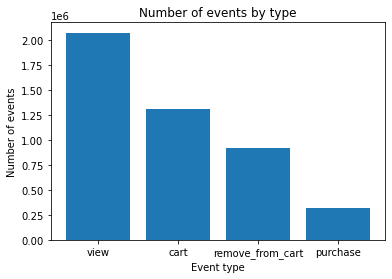

In [29]:
plt.bar(event_type_counts.index, event_type_counts.values)

plt.title('Number of events by type')
plt.xlabel('Event type')
plt.ylabel('Number of events')

plt.show()


### Question 6:
#### 6-abcd

In [30]:
df_6_abcd = df_sorted.copy()


In [31]:
df_6_abcd


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel
732441,2019-11-06 15:12:02 UTC,remove_from_cart,5660213,NaN,230956608,230956608,2019-11-06 15:12:02+00:00,0,0.0,0,1
732445,2019-11-06 15:12:04 UTC,remove_from_cart,5773401,NaN,230956608,230956608,2019-11-06 15:12:04+00:00,0,NaN,1,1
2150628,2019-11-16 20:53:37 UTC,cart,5875317,NaN,234195672,234195672,2019-11-16 20:53:37+00:00,1,0.0,0,1
2150636,2019-11-16 20:53:40 UTC,remove_from_cart,5863841,NaN,234195672,234195672,2019-11-16 20:53:40+00:00,1,NaN,1,1
3346744,2019-11-23 17:06:08 UTC,cart,5830276,NaN,238583000,238583000,2019-11-23 17:06:08+00:00,2,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3936488,2019-11-27 09:26:21 UTC,view,5588154,NaN,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328,0.0,0,2
3936633,2019-11-27 09:27:35 UTC,view,5676246,NaN,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:27:35+00:00,942328,0.0,1,1
1225082,2019-11-09 17:02:14 UTC,view,5847328,NaN,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329,0.0,0,9
159765,2019-11-02 11:47:34 UTC,view,5528034,NaN,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330,0.0,0,1


#### 6e :
##### Calculate the difference between the maximum and minimum value of visit IDs and visit numbers for each user and visit number :

In [32]:
df_6_e = df_6_abcd.copy()
df_6_e['Num_of_events'] = df_6_e.groupby(['user_id', 'user_session'])['event_type'].transform('count')
df_6_e = df_6_e.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_e


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,Num_of_events
732441,2019-11-06 15:12:02 UTC,remove_from_cart,5660213,NaN,230956608,230956608,2019-11-06 15:12:02+00:00,0,0.0,0,1,2
2150628,2019-11-16 20:53:37 UTC,cart,5875317,NaN,234195672,234195672,2019-11-16 20:53:37+00:00,1,0.0,0,1,2
3346744,2019-11-23 17:06:08 UTC,cart,5830276,NaN,238583000,238583000,2019-11-23 17:06:08+00:00,2,4.0,0,1,3
2877043,2019-11-21 17:11:03 UTC,cart,5809910,NaN,240261211,240261211,2019-11-21 17:11:03+00:00,3,4.0,0,1,3
206324,2019-11-02 18:44:41 UTC,cart,5809910,NaN,240812446,240812446,2019-11-02 18:44:41+00:00,4,0.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3641257,2019-11-25 07:22:33 UTC,view,5790563,NaN,576334415,ffff5096-a5d3-4abf-b34b-9627203bb025,2019-11-25 07:22:33+00:00,942327,NaN,0,1,1
3936488,2019-11-27 09:26:21 UTC,view,5588154,NaN,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328,0.0,0,2,2
1225082,2019-11-09 17:02:14 UTC,view,5847328,NaN,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329,0.0,0,9,1
159765,2019-11-02 11:47:34 UTC,view,5528034,NaN,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330,0.0,0,1,1


#### 6f :
##### Calculate the duration of each visit in seconds :

In [33]:
df_6_f = df_6_abcd.copy()
df_6_f['total_time'] = df_6_f.groupby(['user_id', 'user_session'])['duration_to_next_event'].transform('sum')
df_6_f = df_6_f.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_f


,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,total_time
732441,2019-11-06 15:12:02 UTC,remove_from_cart,5660213,NaN,230956608,230956608,2019-11-06 15:12:02+00:00,0,0.0,0,1,0.0
2150628,2019-11-16 20:53:37 UTC,cart,5875317,NaN,234195672,234195672,2019-11-16 20:53:37+00:00,1,0.0,0,1,0.0
3346744,2019-11-23 17:06:08 UTC,cart,5830276,NaN,238583000,238583000,2019-11-23 17:06:08+00:00,2,4.0,0,1,4.0
2877043,2019-11-21 17:11:03 UTC,cart,5809910,NaN,240261211,240261211,2019-11-21 17:11:03+00:00,3,4.0,0,1,4.0
206324,2019-11-02 18:44:41 UTC,cart,5809910,NaN,240812446,240812446,2019-11-02 18:44:41+00:00,4,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3641257,2019-11-25 07:22:33 UTC,view,5790563,NaN,576334415,ffff5096-a5d3-4abf-b34b-9627203bb025,2019-11-25 07:22:33+00:00,942327,NaN,0,1,0.0
3936488,2019-11-27 09:26:21 UTC,view,5588154,NaN,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328,0.0,0,2,0.0
1225082,2019-11-09 17:02:14 UTC,view,5847328,NaN,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329,0.0,0,9,0.0
159765,2019-11-02 11:47:34 UTC,view,5528034,NaN,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330,0.0,0,1,0.0


#### 6g :

In [34]:
df_q_g = df_sorted.copy()
df_q_g = df_q_g[df_q_g['event_type'] == 'view']
df_q_g['list_of_viewed'] = df_q_g.groupby(['user_id','user_session'])['product_id'].transform(lambda x : [x.tolist()]*len(x))
df_q_g = df_q_g.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_q_g

,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,list_of_viewed
715819,2019-11-06 12:58:49 UTC,view,5646693,NaN,568185424,568185424,2019-11-06 12:58:49+00:00,145,NaN,0,1,[5646693]
1031023,2019-11-08 09:30:48 UTC,view,5770385,NaN,568890497,568890497,2019-11-08 09:30:48+00:00,159,NaN,0,1,[5770385]
1202646,2019-11-09 13:40:03 UTC,view,5769877,NaN,569346511,569346511,2019-11-09 13:40:03+00:00,170,0.0,0,1,[5769877]
1587900,2019-11-12 13:01:28 UTC,view,5560754,NaN,570572734,570572734,2019-11-12 13:01:28+00:00,189,0.0,0,1,[5560754]
1735640,2019-11-13 15:11:39 UTC,view,5804820,NaN,571078493,571078493,2019-11-13 15:11:39+00:00,194,0.0,0,1,[5804820]
...,...,...,...,...,...,...,...,...,...,...,...,...
3641257,2019-11-25 07:22:33 UTC,view,5790563,NaN,576334415,ffff5096-a5d3-4abf-b34b-9627203bb025,2019-11-25 07:22:33+00:00,942327,NaN,0,1,[5790563]
3936488,2019-11-27 09:26:21 UTC,view,5588154,NaN,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2019-11-27 09:26:21+00:00,942328,0.0,0,2,"[5588154, 5676246]"
1225082,2019-11-09 17:02:14 UTC,view,5847328,NaN,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,2019-11-09 17:02:14+00:00,942329,0.0,0,9,[5847328]
159765,2019-11-02 11:47:34 UTC,view,5528034,NaN,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,942330,0.0,0,1,[5528034]


#### 6h :

In [35]:
df_6_h = df_sorted.copy()
df_6_h = df_6_h[df_6_h['event_type'] == 'cart']
df_6_h['list_of_added_to_cart'] = df_6_h.groupby(['user_id','user_session'])['product_id'].transform(lambda x : [x.tolist()]*len(x))
df_6_h = df_6_h.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_h

,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,list_of_added_to_cart
2150628,2019-11-16 20:53:37 UTC,cart,5875317,NaN,234195672,234195672,2019-11-16 20:53:37+00:00,1,0.0,0,1,[5875317]
3346744,2019-11-23 17:06:08 UTC,cart,5830276,NaN,238583000,238583000,2019-11-23 17:06:08+00:00,2,4.0,0,1,"[5830276, 5830274, 5830273]"
2877043,2019-11-21 17:11:03 UTC,cart,5809910,NaN,240261211,240261211,2019-11-21 17:11:03+00:00,3,4.0,0,1,"[5809910, 5809910]"
206324,2019-11-02 18:44:41 UTC,cart,5809910,NaN,240812446,240812446,2019-11-02 18:44:41+00:00,4,0.0,0,1,"[5809910, 5809910]"
2289938,2019-11-18 00:04:13 UTC,cart,5809910,NaN,250551373,250551373,2019-11-18 00:04:13+00:00,5,0.0,0,1,[5809910]
...,...,...,...,...,...,...,...,...,...,...,...,...
1357679,2019-11-10 18:36:39 UTC,cart,5793704,NaN,469254003,fffea97b-ad5d-4b24-9831-8cad79934e20,2019-11-10 18:36:39+00:00,942318,267.0,2,13,"[5793704, 5585632, 5585630, 5809343, 5779240, ..."
1875731,2019-11-14 15:29:25 UTC,cart,5815574,NaN,552423412,ffff093c-72f9-4495-945e-494cbed24282,2019-11-14 15:29:25+00:00,942321,12.0,0,2,"[5815574, 5532765, 8703, 8705, 8706, 5818264, ..."
3292742,2019-11-23 12:09:37 UTC,cart,5761285,NaN,561976092,ffff0edb-5c21-4ee7-af19-b6e0006e8ee3,2019-11-23 12:09:37+00:00,942322,0.0,1,17,[5761285]
1487822,2019-11-11 17:47:04 UTC,cart,5735268,NaN,570247654,ffff43f5-765c-406f-8dd1-5486d3ae62e2,2019-11-11 17:47:04+00:00,942325,NaN,1,8,[5735268]


#### 6i :

In [36]:
df_6_i = df_sorted.copy()
df_6_i = df_6_i[df_6_i['event_type'] == 'purchase']
df_6_i['list_of_purchased'] = df_6_i.groupby(['user_id','user_session'])['product_id'].transform(lambda x : [x.tolist()]*len(x))
df_6_i = df_6_i.drop_duplicates(subset=['user_id', 'user_session'], keep='first')
df_6_i

,event_time,event_type,product_id,price,user_id,user_session,datetime,user_session_numeric,duration_to_next_event,funnel_number,index_in_funnel,list_of_purchased
870367,2019-11-07 12:31:32 UTC,purchase,5844306,NaN,549507462,0002ad82-84d0-40be-8d1a-b48de3ef8fe3,2019-11-07 12:31:32+00:00,352,0.0,309,1,"[5844306, 5841721, 5844303, 5843837, 5843642, ..."
3156107,2019-11-22 18:23:40 UTC,purchase,5866057,NaN,486768293,0005adfb-7989-8f89-e867-09aa92883a50,2019-11-22 18:23:40+00:00,394,0.0,0,1,"[5866057, 5839238, 5839239]"
2408913,2019-11-18 18:39:39 UTC,purchase,5767806,NaN,573142026,000737df-40bd-46dc-9ab7-96bc4df35719,2019-11-18 18:39:39+00:00,424,0.0,9,1,"[5767806, 5747360, 5550700]"
3540660,2019-11-24 16:18:49 UTC,purchase,5824840,NaN,554992048,00087855-bf59-4502-a16f-99fdc11fbbfc,2019-11-24 16:18:49+00:00,441,0.0,16,1,"[5824840, 5819229, 5819226, 5819241, 5823410, ..."
1434384,2019-11-11 11:11:59 UTC,purchase,5723406,NaN,570068844,0009fc62-1478-4563-a3fb-23e7764d49cc,2019-11-11 11:11:59+00:00,460,0.0,59,1,"[5723406, 5759279, 38753, 5890134, 5826601, 57..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4338705,2019-11-29 10:39:44 UTC,purchase,5823407,NaN,432461842,fff05250-26c3-462f-9fca-7f3224795716,2019-11-29 10:39:44+00:00,942118,0.0,2,7,"[5823407, 5763933]"
909398,2019-11-07 16:05:45 UTC,purchase,5820532,NaN,568631639,fff1708e-0b21-4417-a776-6db7bdb61585,2019-11-07 16:05:45+00:00,942134,0.0,20,1,"[5820532, 5686812, 5820527, 5842361, 5820526, ..."
2794201,2019-11-21 10:17:51 UTC,purchase,5649255,NaN,574352665,fff5d350-b897-4d87-8792-f9c7ef49907f,2019-11-21 10:17:51+00:00,942197,0.0,6,1,"[5649255, 5635098, 5897370, 5549838]"
1951310,2019-11-15 07:43:16 UTC,purchase,5769921,NaN,493662695,fff8439d-1348-4070-944d-66598fccb7c6,2019-11-15 07:43:16+00:00,942231,0.0,7,1,"[5769921, 5808333]"
